# Solving the Taxi problem with Q-learning

In [17]:
import torch
import gym

env = gym.make('Taxi-v3')

n_state = env.observation_space.n
print(n_state)

n_action = env.action_space.n
print(n_action)

env.reset()

env.render()

500
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [18]:
env.step(1)
env.step(4) #pickup

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


In [19]:
env.step(0)
env.step(0)
env.step(0)
env.step(0)
env.step(3)
env.step(5) #drop

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [0]:
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function


from collections import defaultdict


def q_learning(env, gamma, n_episode, alpha):
    """
    Obtain the optimal policy with off-policy Q-learning method
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param n_episode: number of episodes
    @return: the optimal Q-function, and the optimal policy
    """
    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        while not is_done:
            action = epsilon_greedy_policy(state, Q)
            next_state, reward, is_done, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
            Q[state][action] += alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = next_state
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

gamma = 1

n_episode = 500

alpha = 0.4

epsilon = 0.1

epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

optimal_Q, optimal_policy = q_learning(env, gamma, n_episode, alpha)

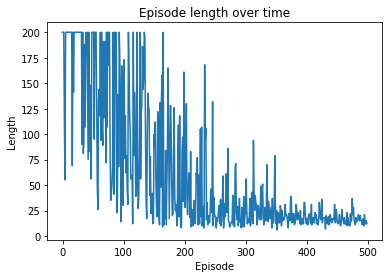

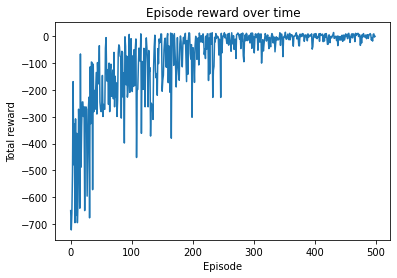

In [21]:
import matplotlib.pyplot as plt
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()


plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()